In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import pandas as pd


file_path = r"C:\Users\USER\Desktop\amazon\amazon.csv"
data = pd.read_csv(file_path, encoding='iso-8859-1',parse_dates=['date'])


In [107]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [25]:
#1.Diaplay top 5 rows of the dataset

In [108]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [29]:
#2.check last 5 rows of the datset

In [109]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [38]:
#3.find shape  of our dataset (Number of rows and number of columns)

In [110]:
data.shape

(6454, 5)

In [71]:
print ("Number of rows",data.shape[0])
print ("Number of columnss",data.shape[1])

Number of rows 6454
Number of columnss 5


In [39]:
#4.Getting information about our dataset like total number of rows ,total number of columns ,datatypes of each column and memory requirement

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [40]:
#5.Check for duplicate data and drop them

In [112]:
dup_data=data.duplicated().any()

In [74]:
print ("Are there any duplicated values  in the data",dup_data)

Are there any duplicated values  in the data True


In [113]:
data= data.drop_duplicates()

In [76]:
data.shape

(6422, 5)

In [47]:
#6.Check null values in dataset

In [114]:
data. isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [52]:
#7.Get overall statistics about the dataframe

In [115]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [53]:
#8.Rename month names to english

In [116]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [117]:
data['month_new']=data['month'].map({'Janeiro' :'jan',
                                     'Fevereiro':'feb',
                                     'Marco':'march',
                                     'Abril': 'april',
                                     'Maio':'may',
                                     'Junho':'jun',
                                     'Julho':'july',
                                     'Agosto':'august',
                                     'setembro':'sep',
                                     'Outurbo': 'oct',
                                     'Novembro':'nov',
                                     'Dezembro':'dec'
                                    })
                                     

In [118]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [82]:
#9.Total number of fires registered

In [119]:
data.shape

(6422, 6)

In [84]:
#In which month maximum number of forest fires were reported

In [120]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [94]:
data1=data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

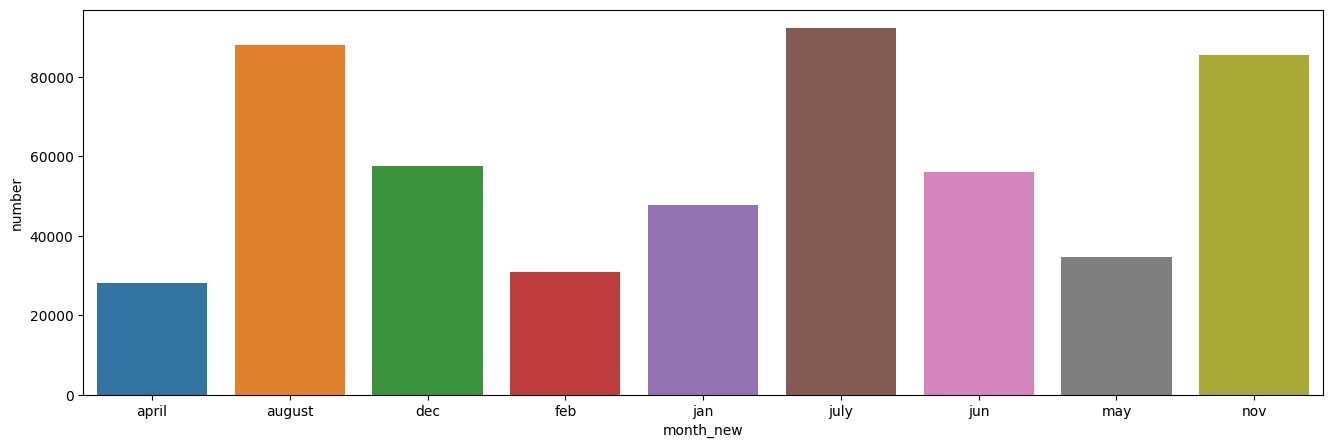

In [121]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data1)

In [95]:
#11in which year maximum number of forest fires were reported/

In [122]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

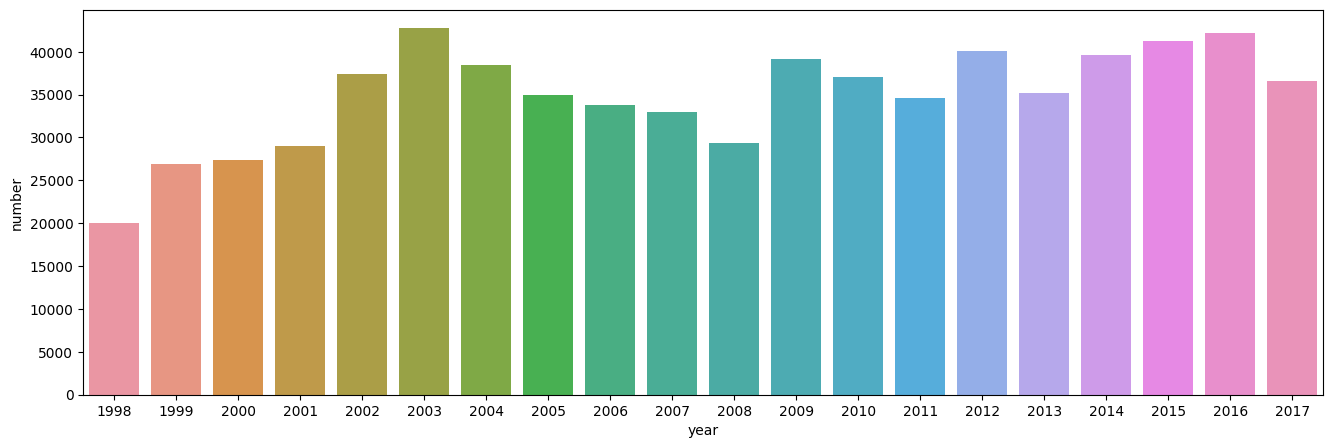

In [123]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

In [124]:
#12.In which state maximum number of forest fires were reported

In [126]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<function matplotlib.pyplot.show(close=None, block=None)>

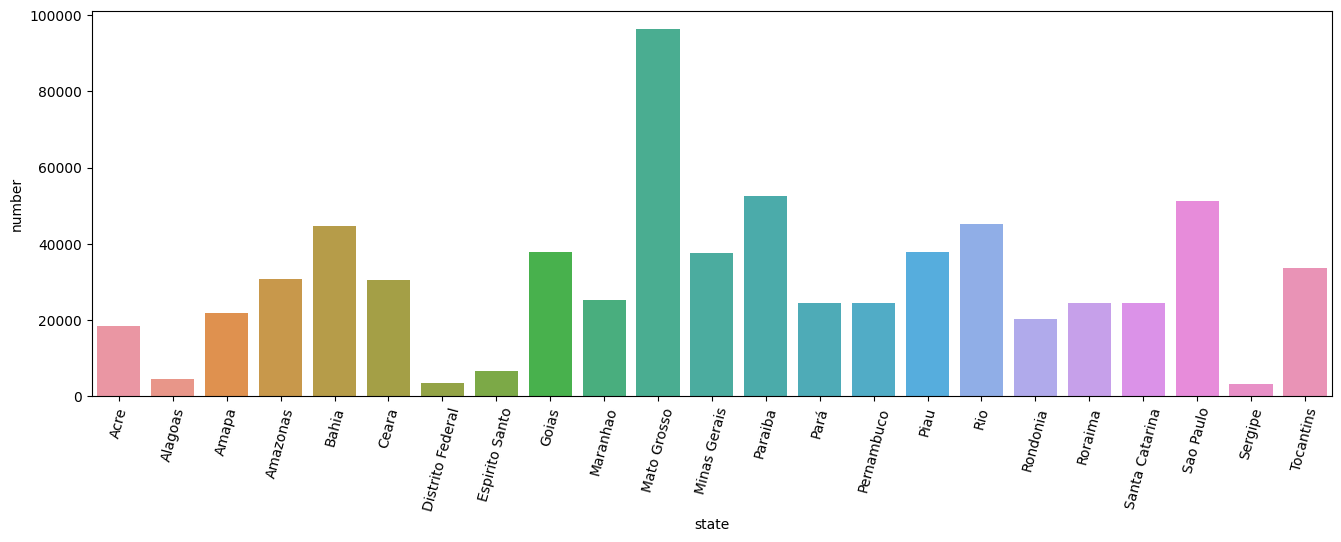

In [128]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)
plt.show

In [130]:
#13.Find total number of fires reported in amazonas

In [131]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [133]:
data[data['state']=="Amazonas"] ['number'].sum()

30650.129

In [134]:
#14.Display Number of fires were reported in Amazonas (year-wise)

In [135]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [137]:
data4=data[data['state']=="Amazonas"]
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

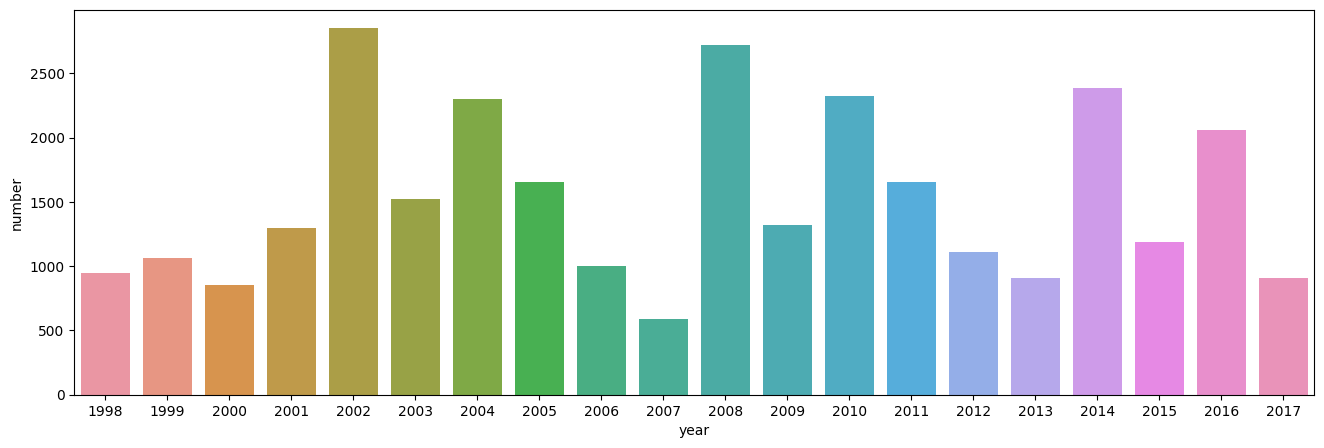

In [141]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data5)

In [142]:
#15.Display number of fires were reprted in amazonas (Day-wise)


In [143]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [144]:
data6=data[data['state']=="Amazonas"]

In [157]:

import calendar

data6 = data6.copy()  # Create a copy of the DataFrame

data6['day_of_week'] = data6['date'].dt.dayofweek

day_data = data6.groupby('day_of_week')['number'].sum().reset_index()

day_data['day_of_week'] = day_data['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

day_data


,day_of_week,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


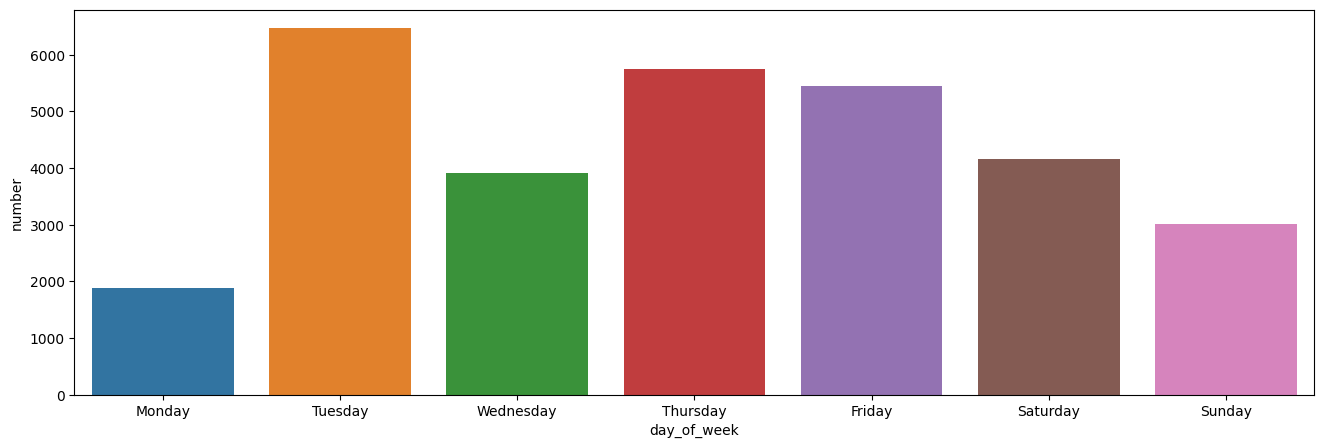

In [161]:
plt.figure(figsize=(16, 5))
sns.barplot(x='day_of_week', y='number', data=day_data)
plt.show()

In [162]:
#16.Find total number of fires were reported in 2015 and visualize data based on each "month"

In [163]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [165]:
fire = data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [166]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518


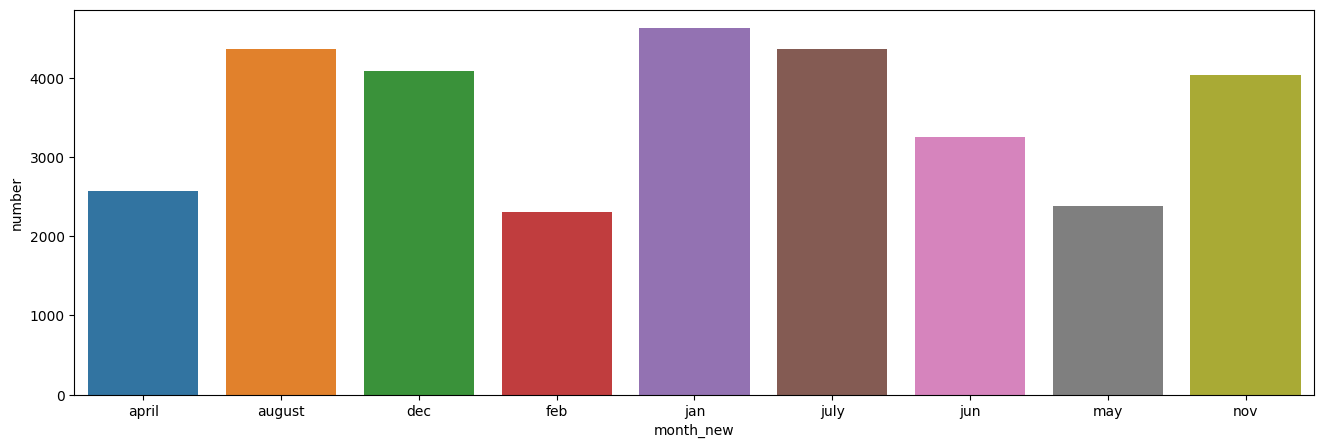

In [167]:
plt.figure(figsize=(16, 5))
sns.barplot(x='month_new', y='number', data=fire)
plt.show()

In [168]:
#17.Find the average number of fires were reported from highest to lowest(state-wise)

In [169]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [172]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [173]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


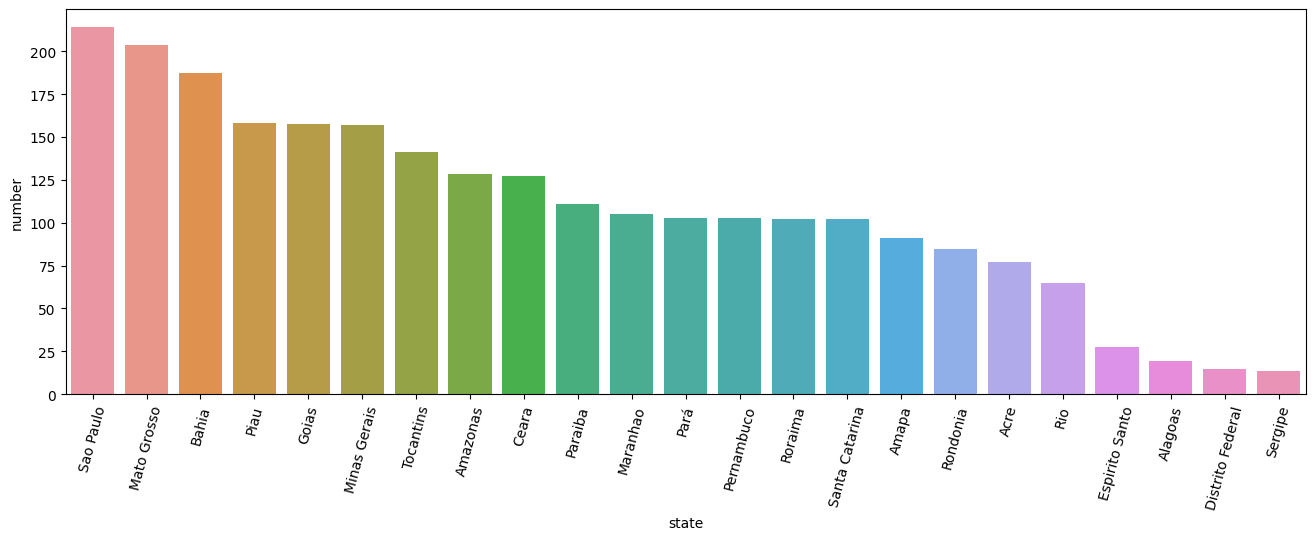

In [175]:
plt.figure(figsize=(16, 5))
sns.barplot(x='state', y='number', data=data8)
plt.xticks(rotation=75)
plt.show()

In [176]:
#18.To find the state names wheres fires were reported in "dec" month

In [177]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [181]:
data[data['month_new']=="dec"] ['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)